# **Analysis of Car Accident Severity at Seattle**

In [41]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
import csv
%matplotlib inline
mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [42]:
#download: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-13 03:42:15--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  44.5MB/s   in 1.6s   

2020-09-13 03:42:17 (44.5 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [43]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [44]:
df.shape

(194673, 38)

In [5]:
#total number of empty inputs in " ROADCOND" ?
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [47]:
#185340/194673 rows of speeding column are null, which has 95% missing data;
#164868/194673 rows of INATTENTIONIND column are null, which has 84% missing data;
#These are not the good candidate columns for our analysis.
Collision_data=df[['OBJECTID','SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE']]
Collision_data.head()

,OBJECTID,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE
0,1,2,Overcast,Wet,Daylight,Intersection
1,2,1,Raining,Wet,Dark - Street Lights On,Block
2,3,1,Overcast,Dry,Daylight,Block
3,4,1,Clear,Dry,Daylight,Block
4,5,2,Raining,Wet,Daylight,Intersection


In [48]:
# there are # rows with null value for WEATHER(5081/194673),ROADCOND(5012/194673),LIGHTCOND(5170/194673)
Collision_data_clean = Collision_data.dropna()
#drop a rows that are missing Age values
#Collision_data_clean.dropna(subset=["Age"], inplace=True)

Collision_data_clean.shape


(187525, 6)

In [49]:
#change columns all to string type.
Collision_data_clean.columns = list(map(str, Collision_data_clean.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in Collision_data_clean.columns)

True

In [50]:
print(Collision_data_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187525 entries, 0 to 194672
Data columns (total 6 columns):
OBJECTID        187525 non-null int64
SEVERITYCODE    187525 non-null int64
WEATHER         187525 non-null object
ROADCOND        187525 non-null object
LIGHTCOND       187525 non-null object
ADDRTYPE        187525 non-null object
dtypes: int64(2), object(4)
memory usage: 10.0+ MB
None


In [42]:
#check frequency distribuegories within this column
print(Collision_data_clean['WEATHER'].value_counts())

Clear                       19230
Raining                      4816
Overcast                     4588
Unknown                       718
Fog/Smog/Smoke                103
Other                          65
Snowing                        53
Sleet/Hail/Freezing Rain        8
Blowing Sand/Dirt               5
Severe Crosswind                4
Name: WEATHER, dtype: int64


In [39]:
#check frequency distribuegories within this column
print(Collision_data_clean['ADDRTYPE'].value_counts())
#print(Collision_data_clean['SEVERITYCODE'].value_counts())


Block           123321
Intersection     63462
Alley              742
Name: ADDRTYPE, dtype: int64


In [43]:
#check frequency distribuegories within this column
print(Collision_data_clean['LIGHTCOND'].value_counts())

Daylight                    21068
Dark - Street Lights On      6257
Dusk                          861
Unknown                       615
Dawn                          409
Dark - No Street Lights       181
Dark - Street Lights Off      177
Other                          22
Name: LIGHTCOND, dtype: int64


In [16]:
#check frequency distribuegories within this column
print(Collision_data_clean['ROADCOND'].value_counts())

Dry               123736
Wet                47223
Unknown            14009
Ice                 1193
Snow/Slush           992
Other                124
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64


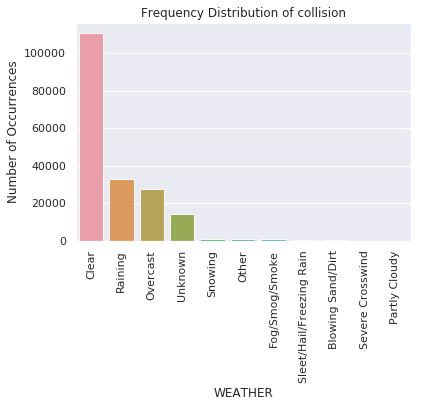

In [51]:
collision_count = Collision_data_clean['WEATHER'].value_counts()
sns.set(style="darkgrid")
sns.barplot(collision_count.index, collision_count.values, alpha=0.9)
plt.title('Frequency Distribution of collision')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('WEATHER', fontsize=12)
plt.xticks(rotation=90)
plt.show()

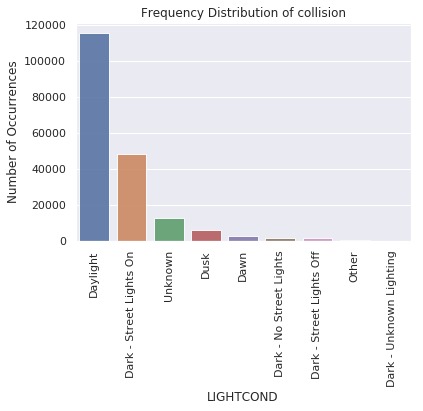

In [18]:
collision_count = Collision_data_clean['LIGHTCOND'].value_counts()
sns.set(style="darkgrid")
sns.barplot(collision_count.index, collision_count.values, alpha=0.9)
plt.title('Frequency Distribution of collision')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('LIGHTCOND', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

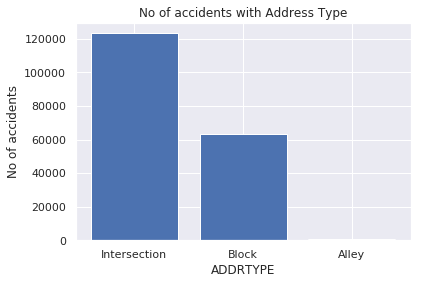

In [52]:
x = Collision_data_clean.ADDRTYPE.unique()
y = Collision_data_clean.ADDRTYPE.value_counts()
plt.bar(x,height=y)
plt.xlabel ('ADDRTYPE')
plt.ylabel ('No of accidents')
plt.title ('No of accidents with Address Type')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

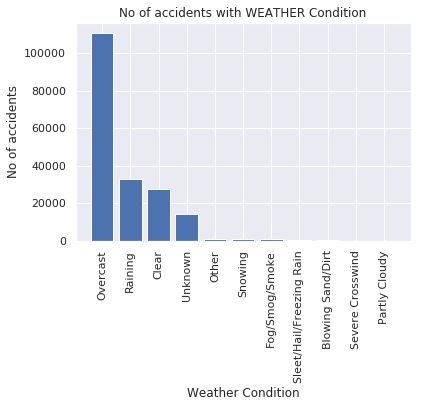

In [58]:
#Collision_data_clean['WEATHER'].value_counts().to_frame()
x = Collision_data_clean.WEATHER.unique()
y = Collision_data_clean.WEATHER.value_counts()
plt.bar(x,height=y)
plt.xlabel ('WEATHER Condition')
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel ('No of accidents')
plt.title ('No of accidents with WEATHER Condition')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

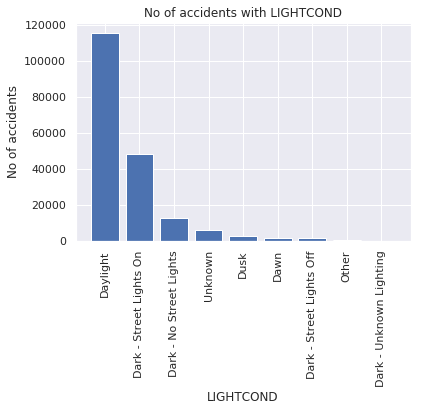

In [55]:
x = Collision_data_clean.LIGHTCOND.unique()
y = Collision_data_clean.LIGHTCOND.value_counts()
plt.bar(x,height=y)
plt.xlabel ('LIGHTCOND')
plt.ylabel ('No of accidents')
plt.title ('No of accidents with LIGHTCOND')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

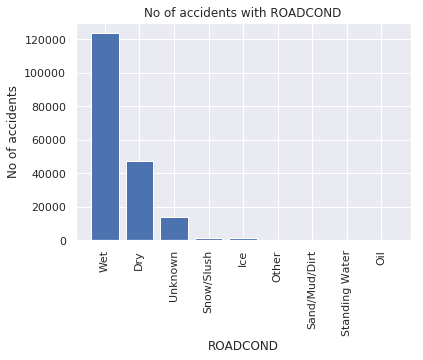

In [56]:
x = Collision_data_clean.ROADCOND.unique()
y = Collision_data_clean.ROADCOND.value_counts()
plt.bar(x,height=y)
plt.xlabel ('ROADCOND')
plt.ylabel ('No of accidents')
plt.title ('No of accidents with ROADCOND')
plt.xticks(rotation=90)
plt.show

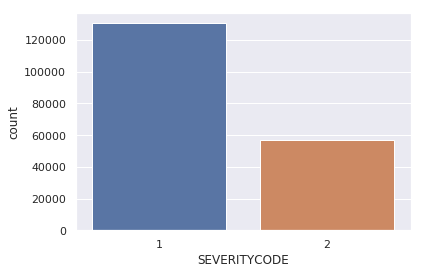

In [32]:
sns.countplot(Collision_data_clean['SEVERITYCODE'])